In [1]:
import os
from cnnheights.training import train_cnn
import numpy as np

ndvi_images = []
pan_images = [] 
annotations = [] 
boundaries = []

# [1] 435172
# python /ar1/PROJ/fjuhsd/personal/thaddaeus/github/cnn-tree-heights/src/monthly/jan2023/library-testing/first_training_test.py > /ar1/PROJ/fjuhsd/personal/thaddaeus/other/cnn-heights/output/log.txt &

computer = 'wh1' # input('m2, wh1, or wsl: ')

if computer == 'm2': 
    data_dir = '/Users/yaroslav/Documents/Work/NASA/data/first_mosaic/rebuilt_approach/output/'
    logging_dir = '/Users/yaroslav/Documents/GitHub/cnn-tree-heights/src/monthly/jan2023/library-testing/cnn-training-output'

elif computer == 'wh1': 
    data_dir = '/ar1/PROJ/fjuhsd/personal/thaddaeus/github/cnn-tree-heights/data/cnn-input/'
    logging_dir = '/ar1/PROJ/fjuhsd/personal/thaddaeus/other/cnn-heights/output'

elif computer == 'wsl': 
    data_dir = ''

else:
    raise Exception('Choose correct computer to work on!')

for file in np.sort(os.listdir(data_dir)):
    full_path = data_dir+file
    if '.png' in file: 
        if 'annotation' in file: 
            annotations.append(full_path) 
 
        elif 'boundary' in file: 
            boundaries.append(full_path) 

        elif 'ndvi' in file: 
            ndvi_images.append(full_path) 

        elif 'extracted_pan' in file: 
            pan_images.append(full_path) 

In [2]:
model, loss_history = train_cnn(ndvi_images, pan_images, annotations, boundaries, logging_dir=logging_dir)

Reading train-test split from file
training_frames [9, 6, 7, 4, 8, 3]
validation_frames [5, 2]
testing_frames [0, 1]


2023-01-28 11:28:54.107841: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/fjuhsd/miniconda3/envs/cnnheights38/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adadelta.py:79: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/home/fjuhsd/miniconda3/envs/cnnheights38/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/home/fjuhsd/miniconda3/envs/cnnheights38/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/nadam.py:86: UserWarning: The `lr` argument is deprecated, use `learnin



[8, 256, 256, 2]


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input (InputLayer)             [(None, 256, 256, 2  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1216        ['Input[0][0]']                  
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                        

In [11]:
hist = loss_history[0].history
list(hist)

['loss',
 'dice_coef',
 'dice_loss',
 'specificity',
 'sensitivity',
 'accuracy',
 'val_loss',
 'val_dice_coef',
 'val_dice_loss',
 'val_specificity',
 'val_sensitivity',
 'val_accuracy']

1

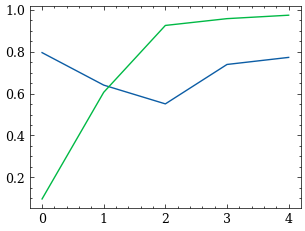

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('https://gist.githubusercontent.com/thissop/d1967ecb352011a4580e2b2274959a89/raw/fe22f835ecb734523e88884bd30c751ca6511cf2/stylish.mplstyle')
x = np.arange(0, len(hist['loss']))

plt.plot(x, hist['loss'])
plt.plot(x, hist['val_loss'])


In [31]:
from cnnheights.plotting import plot_training_diagnostics

figs = plot_training_diagnostics(loss_history=hist, save_path='/ar1/PROJ/fjuhsd/personal/thaddaeus/github/cnn-tree-heights/src/monthly/jan2023/library-testing/training-diagnostic-plots')

<Figure size 350x262.5 with 0 Axes>

<Figure size 350x262.5 with 0 Axes>

<Figure size 350x262.5 with 0 Axes>

<Figure size 350x262.5 with 0 Axes>

<Figure size 350x262.5 with 0 Axes>

<Figure size 350x262.5 with 0 Axes>

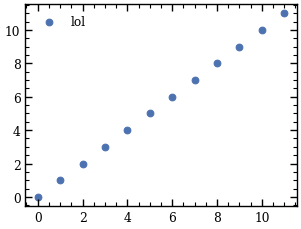

In [27]:
fig, ax = plt.subplots()

x = np.arange(0, 12)

plt.scatter(x,x, label='lol')
ax.legend()

